## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

###Let's get started

In [ ]:
# mount the drive and read required data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import necessary libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%magic inline


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Alma better/Airbnb NYC 2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# get the shape of our data
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

By looking at the info of this data we can summarise that we have some missing values in certain columns. however, most of the columns has no missing value.
let's deep dive to get these missing values and do some feature engineering to get rid of these missing values

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### here in this case notice that we have some irrelavent columns and these are id(which has no relation with our anylaysis), last_review(it's simply the date of last review and since we already have num_of_reviews and reviews_per_month so we can drop this one ), hence we can drop these two colums

In [9]:
df =df.drop(['id', 'last_review','host_name'], axis =1)

In [10]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
df['reviews_per_month'].fillna(0, inplace = True)

In [12]:

df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [13]:
# let's explore how many unique neighbourhood group we have
df.neighbourhood_group.nunique()

5

In [14]:
# finding the number of nieghbourhoods 
df.neighbourhood.nunique()

221

now we know that we have 5 neighbourhood group and 221 neighbours

In [15]:
# exploring how many room type do we have
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
top_host =df.host_id.value_counts().head(10)

In [17]:
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns= {'index': 'Host_id', 'host_id': 'p_counts'} , inplace = True)



#### In above code we have seen top 10 host id's let's visualize the same in bar graph

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

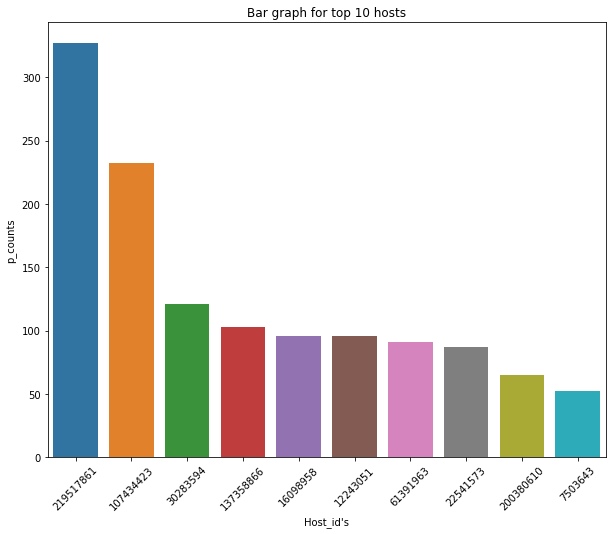

In [18]:
plt.figure(figsize = (10,8))
sns.barplot(data= top_host_df, x='Host_id', y= 'p_counts', order = top_host_df.sort_values('p_counts', ascending = False).Host_id )
plt.title('Bar graph for top 10 hosts')
plt.xlabel("Host_id's")
plt.ylabel('p_counts')
plt.xticks(rotation = 45)


from this graph we can see the distribution of top10 hosts

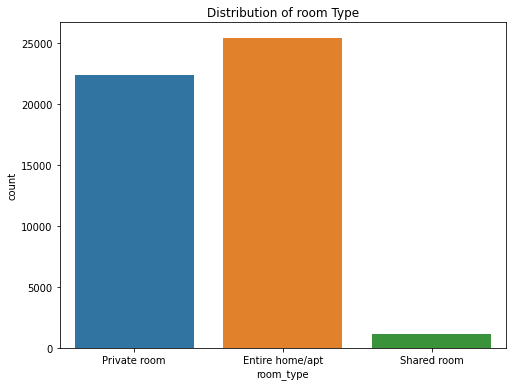

In [19]:
# we can understand the distribution of room type across the data

plt.figure(figsize = (8,6))
sns.countplot(data = df, x= 'room_type')
plt.title('Distribution of room Type')
plt.show()

In [20]:
room_type_dist = pd.DataFrame(df.room_type.value_counts()/len(df)*100).reset_index()

room_type_dist.rename(columns = {'index': ' Room Type', 'room_type': 'Percentage_of_room_type'})

,Room Type,Percentage_of_room_type
0,Entire home/apt,51.966459
1,Private room,45.661111
2,Shared room,2.372431


From this data we can say that most of the listed room are either Private room, or Entire home and there are only 2% shared rooms

In [21]:
df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

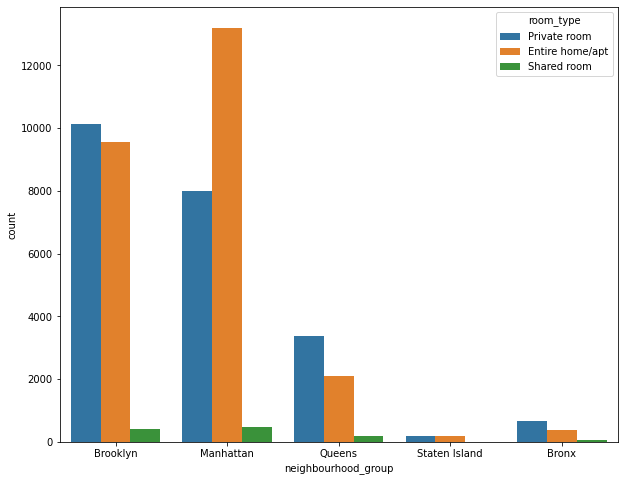

In [22]:
plt.figure(figsize= (10,8))

sns.countplot(data = df, x= 'neighbourhood_group' , hue= 'room_type')
plt.show()

This figure is showing us the distribution of Room type across all the neighbourhoods given in this data. Let's deep down under the data and find how the rooms are distributed top10 neighbouthoods.

In [30]:
# finding the top10 neighbourhoods in terms of listing
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

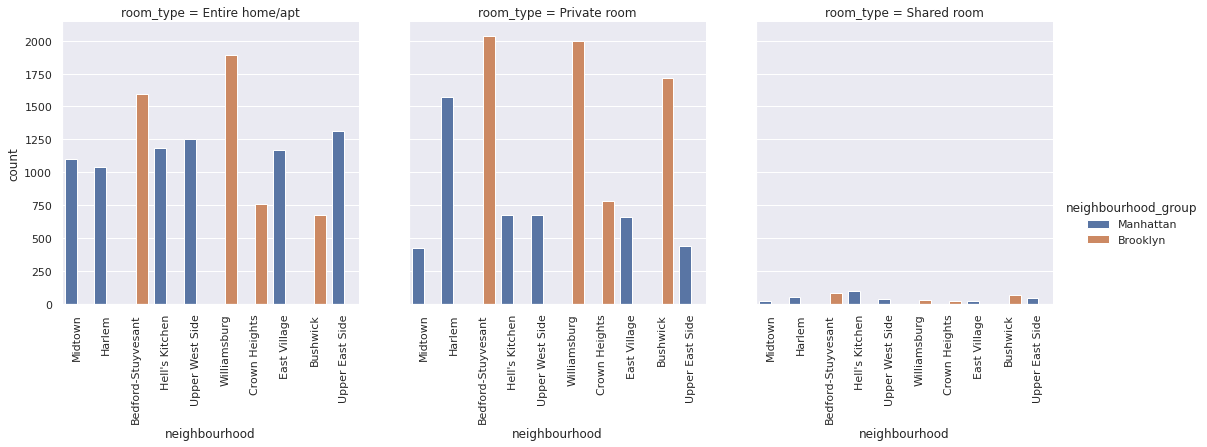

In [35]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

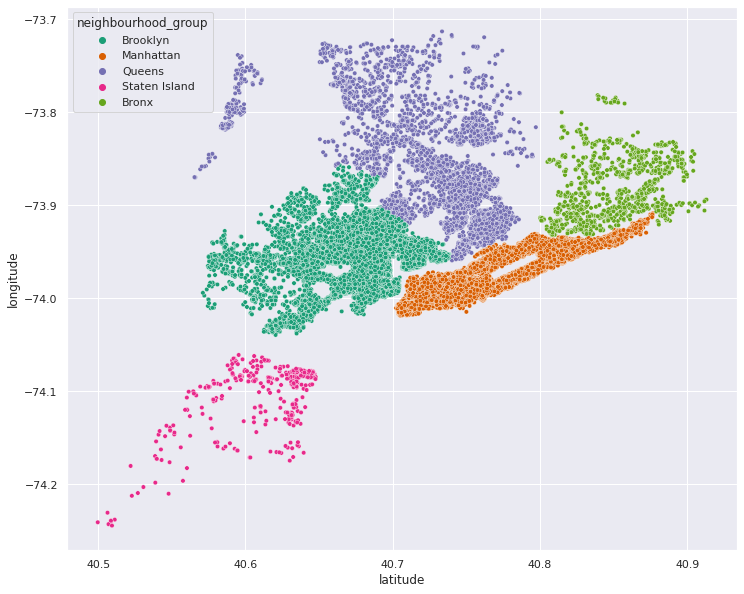

In [23]:
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, x = 'latitude', y= 'longitude', hue= 'neighbourhood_group', palette ='Dark2', s=20)

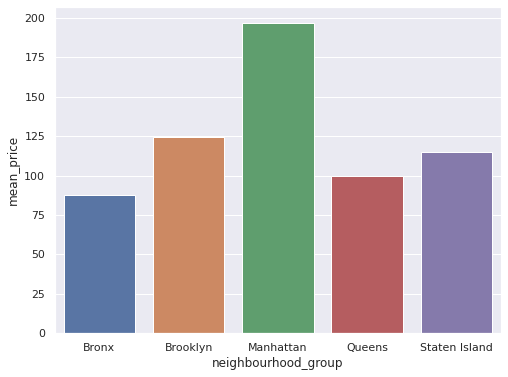

In [24]:
price_dist =pd.DataFrame(df.groupby('neighbourhood_group')['price'].mean()).reset_index()
price_dist = price_dist.rename(columns = {'neighbourhood_group':'neighbourhood_group', 'price':'mean_price'})
price_dist
plt.figure(figsize = (8,6))

sns.barplot(data = price_dist, x = 'neighbourhood_group', y= 'mean_price')
plt.show()

by looking at this graph we can conclude that Manhattan has highest mean price to understand the price distribution in more depth let's calculate the median and mean of the price across all the neighbourhoods


In [25]:

# 75th Percentile
def Q75(x):
    return x.quantile(0.75)

# 90th Percentile
def Q90(x):
    return x.quantile(0.9)

# 97th Percentile
def Q97(x):
    return x.quantile(0.97)



df.groupby('neighbourhood_group').agg({'price':['median','mean','min',Q75, Q90,Q97,'max']})

price                                            
                    median        mean min    Q75    Q90    Q97    max
neighbourhood_group                                                   
Bronx                 65.0   87.496792   0   99.0  145.0  282.4   2500
Brooklyn              90.0  124.383207   0  150.0  210.0  350.0  10000
Manhattan            150.0  196.875814   0  220.0  333.0  599.0  10000
Queens                75.0   99.517649  10  110.0  175.0  275.0  10000
Staten Island         75.0  114.812332  13  110.0  184.0  299.0   5000

Here we can clearly see that there is a noticeble difference between mean and median of the price across various groups which indicates that there can be some outliers in our data

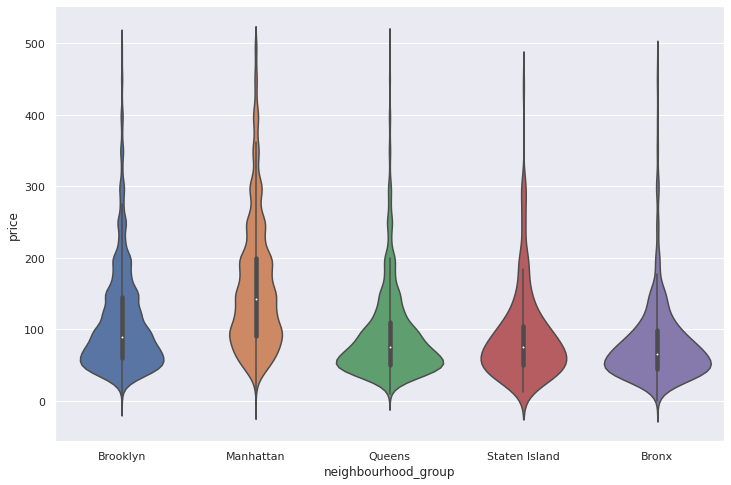

In [26]:
plt.figure(figsize = (12,8))
sub_data=df[df.price < 500]
sns.violinplot(data= sub_data, x= 'neighbourhood_group', y = 'price')


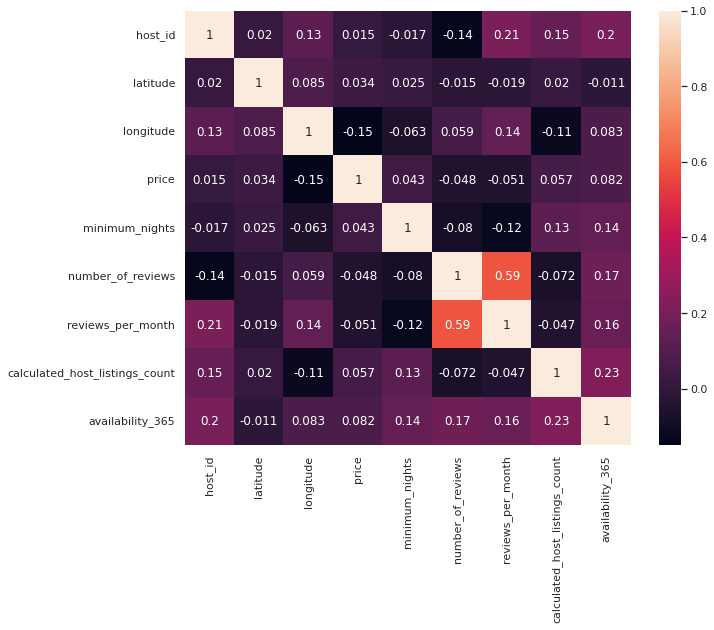

In [27]:
plt.figure(figsize= (10,8))

sns.heatmap(df.corr(), annot = True)

In [28]:
df.groupby('neighbourhood_group').agg({'availability_365':['mean']})

,availability_365
,mean
neighbourhood_group,
Bronx,165.758937
Brooklyn,100.232292
Manhattan,111.979410
Queens,144.451818
Staten Island,199.678284
